In [1]:
from __future__ import division
#
import os, sys
sys.path.append(os.getcwd()+'/..')
#
from supports._setting import individual_detail_dir
from supports.handling_pkl import load_picle_file
from supports.charts import horizontal_bar_chart
#
import numpy as np
import matplotlib.pyplot as plt
#
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def ordering(dids_values):
    order_v_did = []
    for did, v in dids_values.iteritems():
        order_v_did.append([v, did])
    order_v_did.sort()
    order_v_did.reverse()
    return order_v_did

In [3]:
def difference(Y10_data, Y09_data):
    did_diff = {}
    for did in both_years_full_drivers:
        did_diff[did] = Y10_data[did] - Y09_data[did]
    return did_diff

In [4]:
def grouping(data_ranges, values_keys):
    high_group_range, middle_group_range, low_group_range = data_ranges
    total_num = len(values_keys)
    high_group = values_keys[int(high_group_range[0]*total_num):int(high_group_range[1]*total_num)]
    middle_group = values_keys[int(middle_group_range[0]*total_num):int(middle_group_range[1]*total_num)]
    low_group = values_keys[int(low_group_range[0]*total_num):int(low_group_range[1]*total_num)]
    #
    hg_value, hg_did = zip(*high_group)
    mg_value, mg_did = zip(*middle_group)
    lg_value, lg_did = zip(*low_group)
    return hg_value, hg_did, mg_value, mg_did, lg_value, lg_did

In [5]:
def sub_group_statistics(keys, sub_dataset):
    pg_value, ng_value = [], []
    for k in keys:
        v = sub_dataset[k]
        if v >= 0:
            pg_value.append(v)
        else:
            ng_value.append(v)
    return pg_value, ng_value

In [6]:
def group_data_display(data_ranges, main_group_data, sub_group_data = None):
    high_group_range, middle_group_range, low_group_range = data_ranges
    high_per = (high_group_range[1] - high_group_range[0]) * 100
    middle_per = (middle_group_range[1] - middle_group_range[0]) * 100
    low_per = (low_group_range[1] - low_group_range[0]) * 100
    #
    hg_value, mg_value, lg_value = main_group_data
    total_num = len(hg_value) + len(mg_value) + len(lg_value)
    #
    print 'High group: # %d, %.f%%, AVG %.2f' % (len(hg_value), high_per, sum(hg_value)/len(hg_value))
    if sub_group_data:
        pg_value, ng_value = sub_group_data[0]
        print '\t Positive group: # %d, %.f%%, AVG %.2f' % (len(pg_value), len(pg_value)/len(hg_value) * 100, 
                                                          sum(pg_value)/len(pg_value))
        print '\t Negative group: # %d, %.f%%, AVG %.2f' % (len(ng_value), len(ng_value)/len(hg_value) * 100, 
                                                          sum(ng_value)/len(ng_value))
    #
    print 'Middle group: # %d, %.f%%, AVG %.2f' % (len(mg_value), middle_per, sum(mg_value)/len(mg_value))
    if sub_group_data:
        pg_value, ng_value = sub_group_data[1]
        print '\t Positive group: # %d, %.f%%, AVG %.2f' % (len(pg_value), len(pg_value)/len(mg_value) * 100, 
                                                          sum(pg_value)/len(pg_value))
        print '\t Negative group: # %d, %.f%%, AVG %.2f' % (len(ng_value), len(ng_value)/len(hg_value) * 100, 
                                                          sum(ng_value)/len(ng_value))
    #
    print 'Low group: # %d, %.f%%, AVG %.2f' % (len(lg_value), low_per, sum(lg_value)/len(lg_value))
    if sub_group_data:
        pg_value, ng_value = sub_group_data[2]
        print '\t Positive group: # %d, %.f%%, AVG %.2f' % (len(pg_value), len(pg_value)/len(lg_value) * 100, 
                                                          sum(pg_value)/len(pg_value))
        print '\t Negative group: # %d, %.f%%, AVG %.2f' % (len(ng_value), len(ng_value)/len(hg_value) * 100, 
                                                          sum(ng_value)/len(ng_value))        

In [7]:
def summary_of_classification(data_ranges, _main, _sub):
    ordered_main = ordering(_main)
    hg_value, hg_did, mg_value, mg_did, lg_value, lg_did = grouping(data_ranges, ordered_main)
    if _main == _sub:
        sub_group_data = None
    else:
        sub_group_data = [sub_group_statistics(hg_did, _sub), 
                          sub_group_statistics(mg_did, _sub), 
                          sub_group_statistics(lg_did, _sub)]
    group_data_display(data_ranges, [hg_value, mg_value, lg_value], sub_group_data)
    xs = [_sub[did] for _, did in ordered_main]
    horizontal_bar_chart(xs)

In [8]:
both_years_full_drivers,\
Y09_driver_genprod_hour, Y10_driver_genprod_hour, \
Y09_pin_driver_aprod_hour, Y10_pin_driver_aprod_hour, \
Y09_pout_driver_aprod_hour, Y10_pout_driver_aprod_hour = load_picle_file('%s/productivities.pkl' % (individual_detail_dir))

In [9]:
diff_general_prod = difference(Y10_driver_genprod_hour, Y09_driver_genprod_hour)
diff_pin_prod = difference(Y10_pin_driver_aprod_hour, Y09_pin_driver_aprod_hour)
diff_pout_prod = difference(Y10_pout_driver_aprod_hour, Y09_pout_driver_aprod_hour)

In [10]:
high_group_range, middle_group_range, low_group_range = (0.0, 0.05), (0.45, 0.55), (0.95, 1.0)
data_ranges = [high_group_range, middle_group_range, low_group_range]
data_choices = { 'Y09_general':Y09_driver_genprod_hour, 
                 'Y10_general':Y10_driver_genprod_hour,
                 'Y09_pin':Y09_pin_driver_aprod_hour, 
                 'Y10_pin':Y10_pin_driver_aprod_hour,
                 'Y09_pout':Y09_pout_driver_aprod_hour, 
                 'Y09_pout':Y10_pout_driver_aprod_hour,
                 'diff_general':diff_general_prod,
                 'diff_pin':diff_pin_prod,
                 'diff_pout':diff_pout_prod}

Y09_general Y09_general
High group: # 112, 5%, AVG 31.59
Middle group: # 225, 10%, AVG 23.63
Low group: # 113, 5%, AVG 15.65


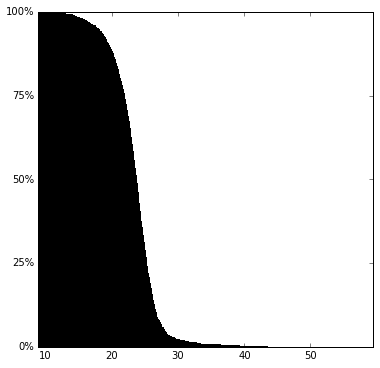


Y09_general Y09_pout
High group: # 112, 5%, AVG 31.59
	 Positive group: # 112, 100%, AVG 26.61
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 23.63
	 Positive group: # 225, 100%, AVG 25.57
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 15.65
	 Positive group: # 113, 100%, AVG 24.84
	 Negative group: # 0, 0%, AVG nan


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in double_scalars


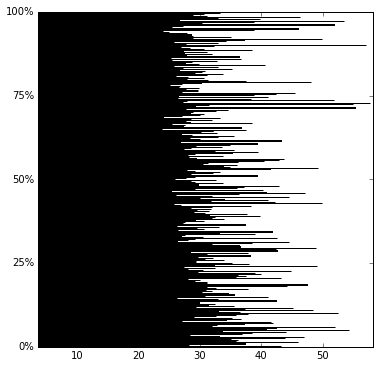


Y09_general Y10_pin
High group: # 112, 5%, AVG 31.59
	 Positive group: # 112, 100%, AVG 25.37
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 23.63
	 Positive group: # 225, 100%, AVG 24.40
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 15.65
	 Positive group: # 113, 100%, AVG 23.00
	 Negative group: # 0, 0%, AVG nan


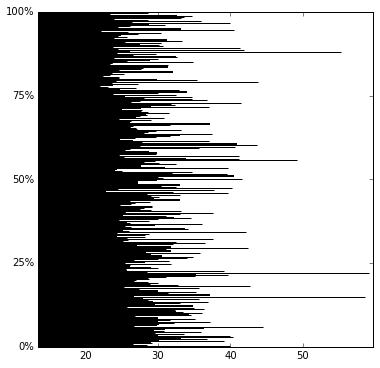


Y09_general diff_general
High group: # 112, 5%, AVG 31.59
	 Positive group: # 77, 69%, AVG 3.73
	 Negative group: # 35, 31%, AVG -3.83
Middle group: # 225, 10%, AVG 23.63
	 Positive group: # 203, 90%, AVG 2.41
	 Negative group: # 22, 20%, AVG -1.61
Low group: # 113, 5%, AVG 15.65
	 Positive group: # 103, 91%, AVG 4.36
	 Negative group: # 10, 9%, AVG -2.85


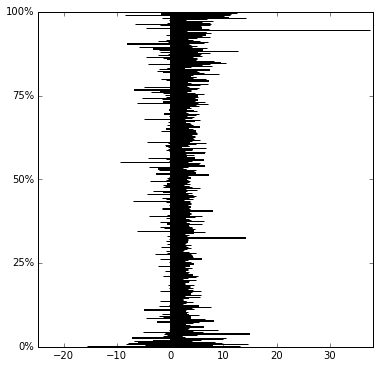


Y09_general Y09_pin
High group: # 112, 5%, AVG 31.59
	 Positive group: # 112, 100%, AVG 23.04
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 23.63
	 Positive group: # 225, 100%, AVG 22.60
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 15.65
	 Positive group: # 113, 100%, AVG 21.19
	 Negative group: # 0, 0%, AVG nan


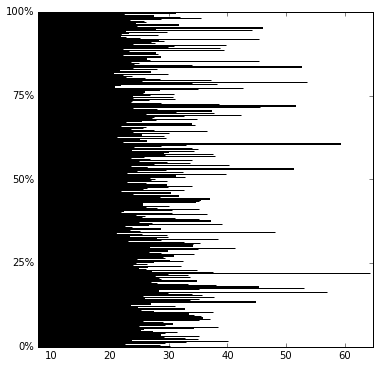


Y09_general Y10_general
High group: # 112, 5%, AVG 31.59
	 Positive group: # 112, 100%, AVG 32.95
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 23.63
	 Positive group: # 225, 100%, AVG 25.65
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 15.65
	 Positive group: # 113, 100%, AVG 19.38
	 Negative group: # 0, 0%, AVG nan


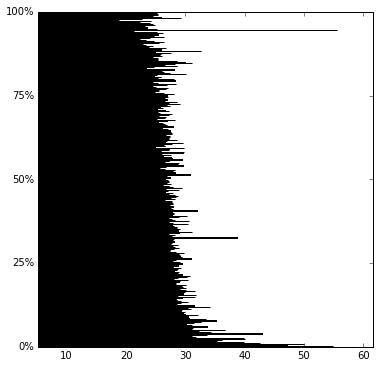


Y09_general diff_pout
High group: # 112, 5%, AVG 31.59
	 Positive group: # 84, 75%, AVG 5.37
	 Negative group: # 28, 25%, AVG -5.74
Middle group: # 225, 10%, AVG 23.63
	 Positive group: # 162, 72%, AVG 4.80
	 Negative group: # 63, 56%, AVG -5.20
Low group: # 113, 5%, AVG 15.65
	 Positive group: # 89, 79%, AVG 5.56
	 Negative group: # 24, 21%, AVG -7.24


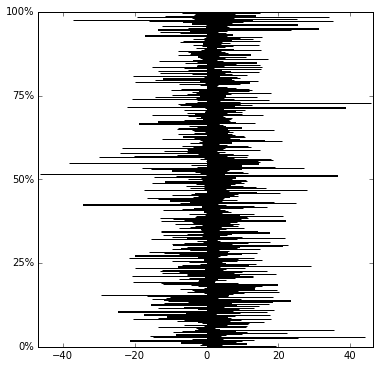


Y09_general diff_pin
High group: # 112, 5%, AVG 31.59
	 Positive group: # 90, 80%, AVG 3.61
	 Negative group: # 22, 20%, AVG -2.90
Middle group: # 225, 10%, AVG 23.63
	 Positive group: # 175, 78%, AVG 3.33
	 Negative group: # 50, 45%, AVG -3.61
Low group: # 113, 5%, AVG 15.65
	 Positive group: # 85, 75%, AVG 3.92
	 Negative group: # 28, 25%, AVG -4.62


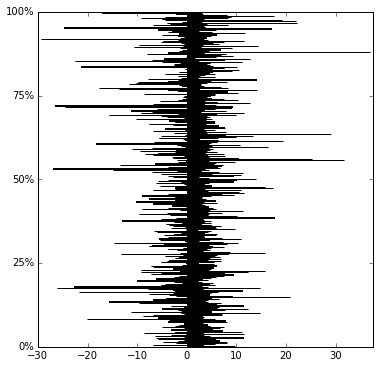


Y09_pout Y09_general
High group: # 112, 5%, AVG 41.84
	 Positive group: # 112, 100%, AVG 24.32
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 24.52
	 Positive group: # 225, 100%, AVG 23.10
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 15.08
	 Positive group: # 113, 100%, AVG 22.98
	 Negative group: # 0, 0%, AVG nan


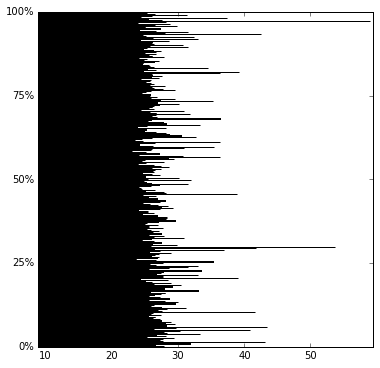


Y09_pout Y09_pout
High group: # 112, 5%, AVG 41.84
Middle group: # 225, 10%, AVG 24.52
Low group: # 113, 5%, AVG 15.08


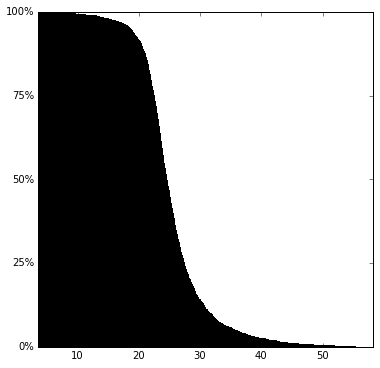


Y09_pout Y10_pin
High group: # 112, 5%, AVG 41.84
	 Positive group: # 112, 100%, AVG 31.42
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 24.52
	 Positive group: # 225, 100%, AVG 23.29
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 15.08
	 Positive group: # 113, 100%, AVG 23.83
	 Negative group: # 0, 0%, AVG nan


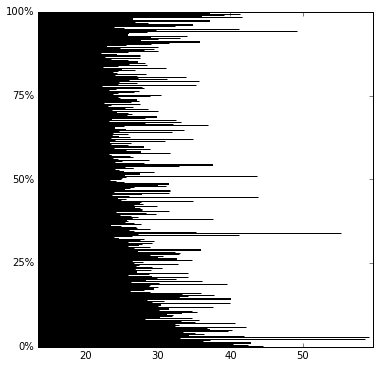


Y09_pout diff_general
High group: # 112, 5%, AVG 41.84
	 Positive group: # 103, 92%, AVG 2.85
	 Negative group: # 9, 8%, AVG -2.95
Middle group: # 225, 10%, AVG 24.52
	 Positive group: # 204, 91%, AVG 2.67
	 Negative group: # 21, 19%, AVG -1.54
Low group: # 113, 5%, AVG 15.08
	 Positive group: # 100, 88%, AVG 2.46
	 Negative group: # 13, 12%, AVG -2.99


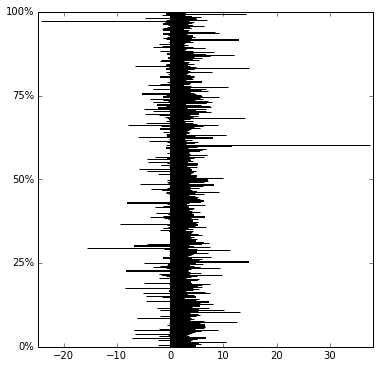


Y09_pout Y09_pin
High group: # 112, 5%, AVG 41.84
	 Positive group: # 112, 100%, AVG 28.46
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 24.52
	 Positive group: # 225, 100%, AVG 21.66
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 15.08
	 Positive group: # 113, 100%, AVG 22.11
	 Negative group: # 0, 0%, AVG nan


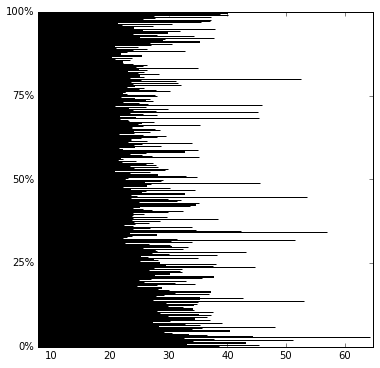


Y09_pout Y10_general
High group: # 112, 5%, AVG 41.84
	 Positive group: # 112, 100%, AVG 26.71
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 24.52
	 Positive group: # 225, 100%, AVG 25.38
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 15.08
	 Positive group: # 113, 100%, AVG 24.81
	 Negative group: # 0, 0%, AVG nan


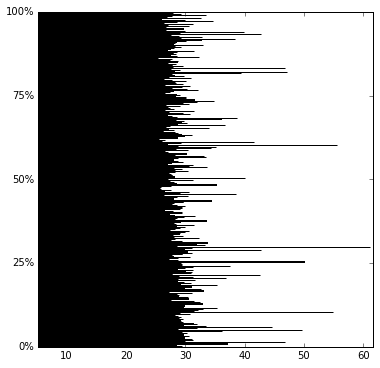


Y09_pout diff_pout
High group: # 112, 5%, AVG 41.84
	 Positive group: # 90, 80%, AVG 16.09
	 Negative group: # 22, 20%, AVG -5.72
Middle group: # 225, 10%, AVG 24.52
	 Positive group: # 187, 83%, AVG 3.14
	 Negative group: # 38, 34%, AVG -4.08
Low group: # 113, 5%, AVG 15.08
	 Positive group: # 22, 19%, AVG 1.71
	 Negative group: # 91, 81%, AVG -8.14


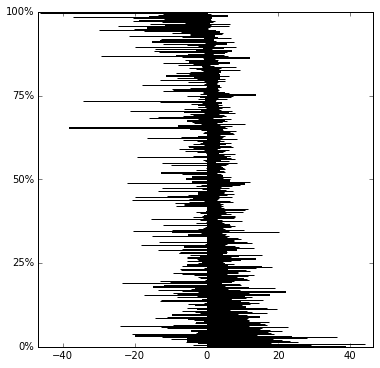


Y09_pout diff_pin
High group: # 112, 5%, AVG 41.84
	 Positive group: # 84, 75%, AVG 5.97
	 Negative group: # 28, 25%, AVG -6.05
Middle group: # 225, 10%, AVG 24.52
	 Positive group: # 178, 79%, AVG 2.97
	 Negative group: # 47, 42%, AVG -3.49
Low group: # 113, 5%, AVG 15.08
	 Positive group: # 75, 66%, AVG 4.28
	 Negative group: # 38, 34%, AVG -3.31


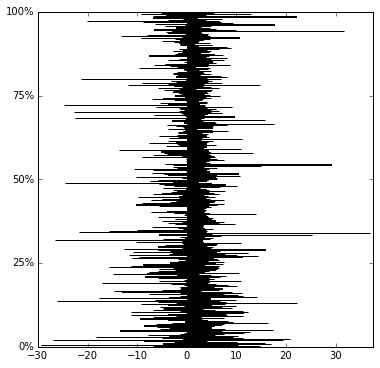


Y10_pin Y09_general
High group: # 112, 5%, AVG 37.13
	 Positive group: # 112, 100%, AVG 24.21
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 23.31
	 Positive group: # 225, 100%, AVG 23.82
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 17.93
	 Positive group: # 113, 100%, AVG 21.61
	 Negative group: # 0, 0%, AVG nan


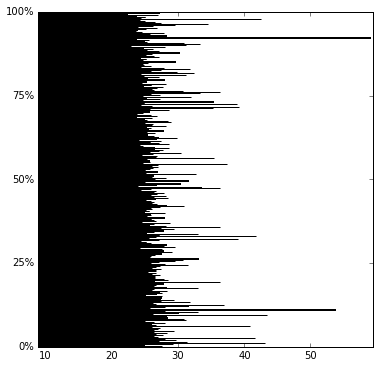


Y10_pin Y09_pout
High group: # 112, 5%, AVG 37.13
	 Positive group: # 112, 100%, AVG 31.87
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 23.31
	 Positive group: # 225, 100%, AVG 24.98
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 17.93
	 Positive group: # 113, 100%, AVG 21.91
	 Negative group: # 0, 0%, AVG nan


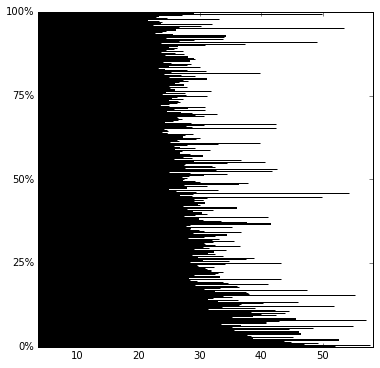


Y10_pin Y10_pin
High group: # 112, 5%, AVG 37.13
Middle group: # 225, 10%, AVG 23.31
Low group: # 113, 5%, AVG 17.93


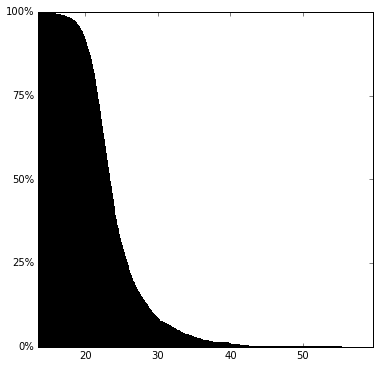


Y10_pin diff_general
High group: # 112, 5%, AVG 37.13
	 Positive group: # 104, 93%, AVG 2.78
	 Negative group: # 8, 7%, AVG -1.75
Middle group: # 225, 10%, AVG 23.31
	 Positive group: # 204, 91%, AVG 2.60
	 Negative group: # 21, 19%, AVG -2.29
Low group: # 113, 5%, AVG 17.93
	 Positive group: # 92, 81%, AVG 2.61
	 Negative group: # 21, 19%, AVG -1.84


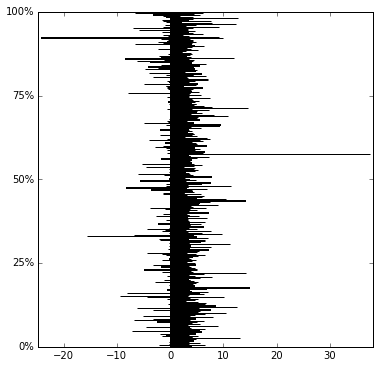


Y10_pin Y09_pin
High group: # 112, 5%, AVG 37.13
	 Positive group: # 112, 100%, AVG 30.06
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 23.31
	 Positive group: # 225, 100%, AVG 21.80
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 17.93
	 Positive group: # 113, 100%, AVG 19.64
	 Negative group: # 0, 0%, AVG nan


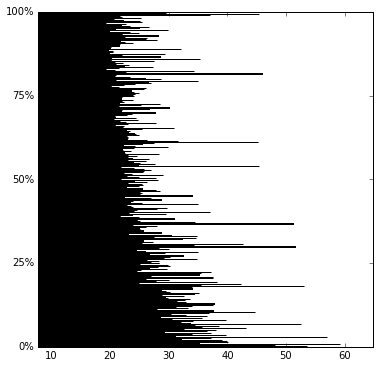


Y10_pin Y10_general
High group: # 112, 5%, AVG 37.13
	 Positive group: # 112, 100%, AVG 26.67
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 23.31
	 Positive group: # 225, 100%, AVG 25.96
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 17.93
	 Positive group: # 113, 100%, AVG 23.40
	 Negative group: # 0, 0%, AVG nan


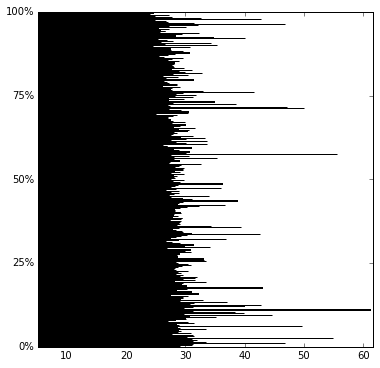


Y10_pin diff_pout
High group: # 112, 5%, AVG 37.13
	 Positive group: # 64, 57%, AVG 11.91
	 Negative group: # 48, 43%, AVG -8.53
Middle group: # 225, 10%, AVG 23.31
	 Positive group: # 175, 78%, AVG 4.08
	 Negative group: # 50, 45%, AVG -4.34
Low group: # 113, 5%, AVG 17.93
	 Positive group: # 76, 67%, AVG 3.31
	 Negative group: # 37, 33%, AVG -4.91


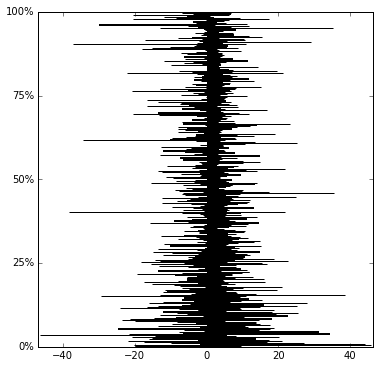


Y10_pin diff_pin
High group: # 112, 5%, AVG 37.13
	 Positive group: # 95, 85%, AVG 9.26
	 Negative group: # 17, 15%, AVG -5.22
Middle group: # 225, 10%, AVG 23.31
	 Positive group: # 177, 79%, AVG 2.54
	 Negative group: # 48, 43%, AVG -2.29
Low group: # 113, 5%, AVG 17.93
	 Positive group: # 44, 39%, AVG 1.91
	 Negative group: # 69, 62%, AVG -4.03


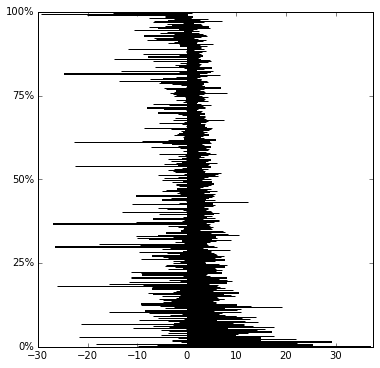


diff_general Y09_general
High group: # 112, 5%, AVG 7.80
	 Positive group: # 112, 100%, AVG 21.93
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 225, 100%, AVG 24.02
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -3.30
	 Positive group: # 113, 100%, AVG 24.70
	 Negative group: # 0, 0%, AVG nan


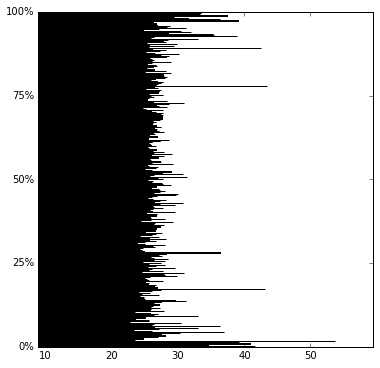


diff_general Y09_pout
High group: # 112, 5%, AVG 7.80
	 Positive group: # 112, 100%, AVG 25.55
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 225, 100%, AVG 25.48
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -3.30
	 Positive group: # 113, 100%, AVG 25.13
	 Negative group: # 0, 0%, AVG nan


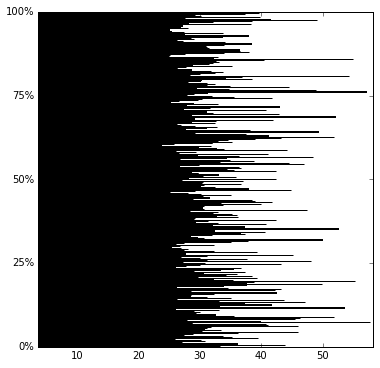


diff_general Y10_pin
High group: # 112, 5%, AVG 7.80
	 Positive group: # 112, 100%, AVG 24.46
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 225, 100%, AVG 25.10
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -3.30
	 Positive group: # 113, 100%, AVG 23.53
	 Negative group: # 0, 0%, AVG nan


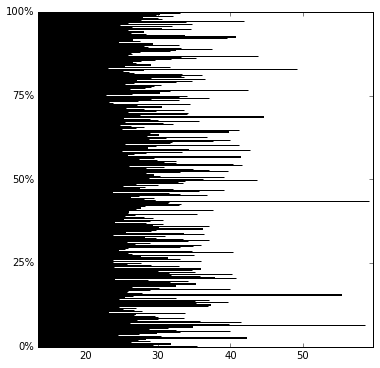


diff_general diff_general
High group: # 112, 5%, AVG 7.80
Middle group: # 225, 10%, AVG 2.22
Low group: # 113, 5%, AVG -3.30


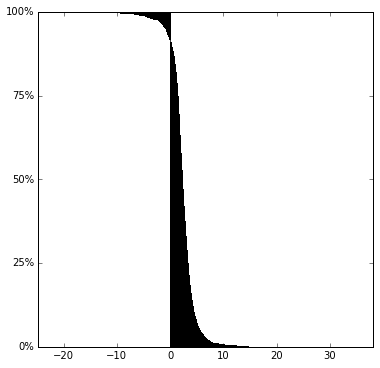


diff_general Y09_pin
High group: # 112, 5%, AVG 7.80
	 Positive group: # 112, 100%, AVG 21.75
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 225, 100%, AVG 23.36
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -3.30
	 Positive group: # 113, 100%, AVG 22.45
	 Negative group: # 0, 0%, AVG nan


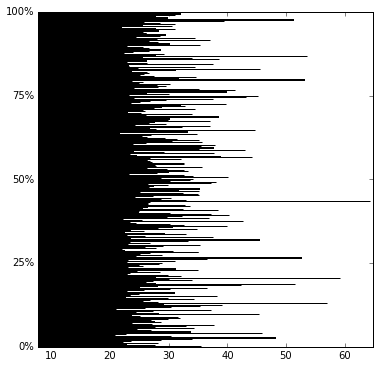


diff_general Y10_general
High group: # 112, 5%, AVG 7.80
	 Positive group: # 112, 100%, AVG 29.74
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 225, 100%, AVG 26.24
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -3.30
	 Positive group: # 113, 100%, AVG 21.40
	 Negative group: # 0, 0%, AVG nan


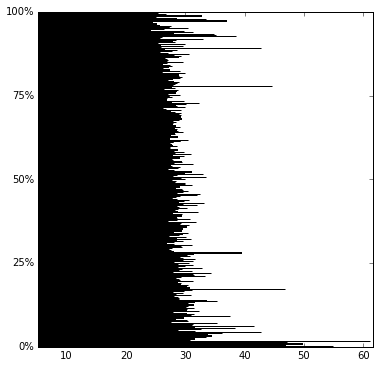


diff_general diff_pout
High group: # 112, 5%, AVG 7.80
	 Positive group: # 91, 81%, AVG 5.35
	 Negative group: # 21, 19%, AVG -5.63
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 166, 74%, AVG 4.39
	 Negative group: # 59, 53%, AVG -3.97
Low group: # 113, 5%, AVG -3.30
	 Positive group: # 77, 68%, AVG 4.73
	 Negative group: # 36, 32%, AVG -4.86


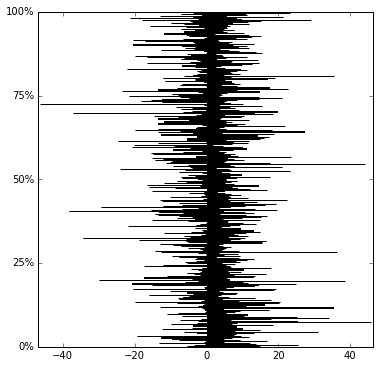


diff_general diff_pin
High group: # 112, 5%, AVG 7.80
	 Positive group: # 99, 88%, AVG 3.79
	 Negative group: # 13, 12%, AVG -5.52
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 173, 77%, AVG 3.05
	 Negative group: # 52, 46%, AVG -2.63
Low group: # 113, 5%, AVG -3.30
	 Positive group: # 76, 67%, AVG 3.54
	 Negative group: # 37, 33%, AVG -3.96


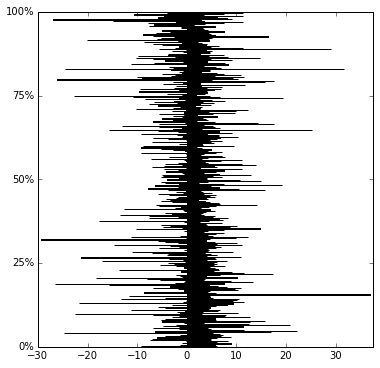


Y09_pin Y09_general
High group: # 112, 5%, AVG 37.81
	 Positive group: # 112, 100%, AVG 24.18
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 21.32
	 Positive group: # 225, 100%, AVG 23.96
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 16.20
	 Positive group: # 113, 100%, AVG 21.80
	 Negative group: # 0, 0%, AVG nan


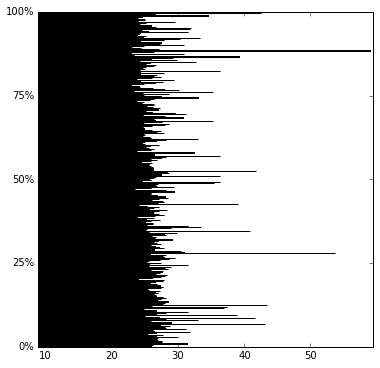


Y09_pin Y09_pout
High group: # 112, 5%, AVG 37.81
	 Positive group: # 112, 100%, AVG 29.64
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 21.32
	 Positive group: # 225, 100%, AVG 25.15
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 16.20
	 Positive group: # 113, 100%, AVG 22.87
	 Negative group: # 0, 0%, AVG nan


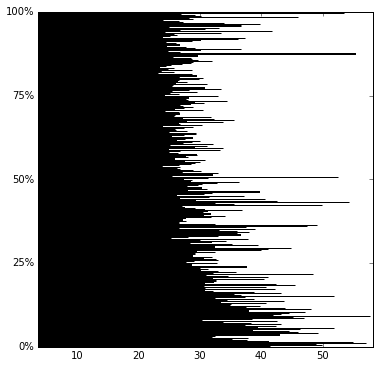


Y09_pin Y10_pin
High group: # 112, 5%, AVG 37.81
	 Positive group: # 112, 100%, AVG 31.07
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 21.32
	 Positive group: # 225, 100%, AVG 23.62
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 16.20
	 Positive group: # 113, 100%, AVG 22.01
	 Negative group: # 0, 0%, AVG nan


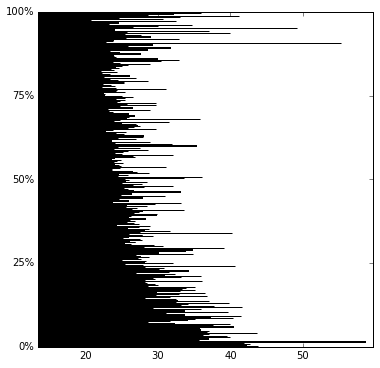


Y09_pin diff_general
High group: # 112, 5%, AVG 37.81
	 Positive group: # 108, 96%, AVG 2.62
	 Negative group: # 4, 4%, AVG -1.15
Middle group: # 225, 10%, AVG 21.32
	 Positive group: # 197, 88%, AVG 2.55
	 Negative group: # 28, 25%, AVG -2.09
Low group: # 113, 5%, AVG 16.20
	 Positive group: # 99, 88%, AVG 3.33
	 Negative group: # 14, 12%, AVG -2.49


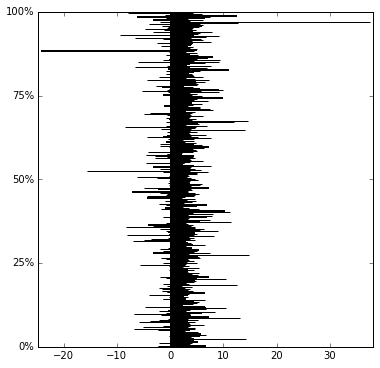


Y09_pin Y09_pin
High group: # 112, 5%, AVG 37.81
Middle group: # 225, 10%, AVG 21.32
Low group: # 113, 5%, AVG 16.20


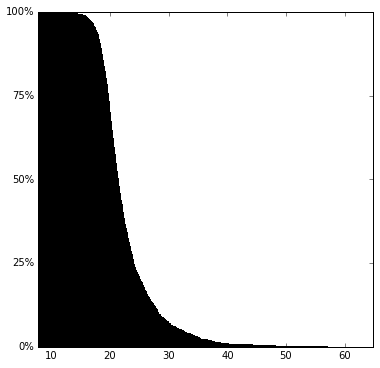


Y09_pin Y10_general
High group: # 112, 5%, AVG 37.81
	 Positive group: # 112, 100%, AVG 26.67
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 21.32
	 Positive group: # 225, 100%, AVG 25.93
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 16.20
	 Positive group: # 113, 100%, AVG 24.41
	 Negative group: # 0, 0%, AVG nan


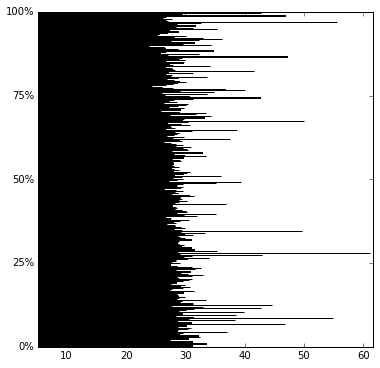


Y09_pin diff_pout
High group: # 112, 5%, AVG 37.81
	 Positive group: # 59, 53%, AVG 8.80
	 Negative group: # 53, 47%, AVG -8.67
Middle group: # 225, 10%, AVG 21.32
	 Positive group: # 183, 81%, AVG 3.84
	 Negative group: # 42, 38%, AVG -3.39
Low group: # 113, 5%, AVG 16.20
	 Positive group: # 85, 75%, AVG 5.37
	 Negative group: # 28, 25%, AVG -5.30


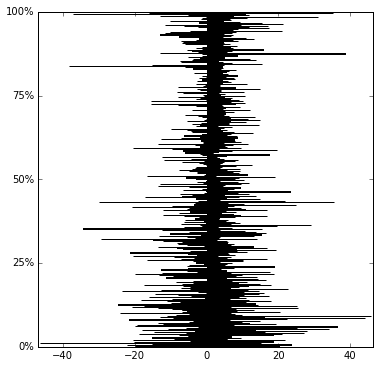


Y09_pin diff_pin
High group: # 112, 5%, AVG 37.81
	 Positive group: # 19, 17%, AVG 4.62
	 Negative group: # 93, 83%, AVG -9.06
Middle group: # 225, 10%, AVG 21.32
	 Positive group: # 203, 90%, AVG 2.71
	 Negative group: # 22, 20%, AVG -1.58
Low group: # 113, 5%, AVG 16.20
	 Positive group: # 110, 97%, AVG 5.98
	 Negative group: # 3, 3%, AVG -0.64


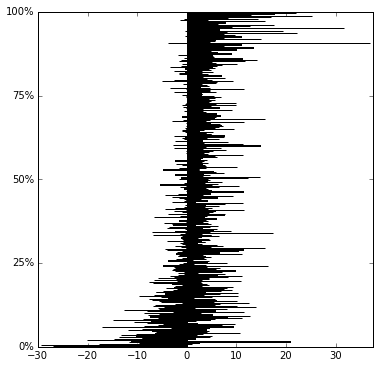


Y10_general Y09_general
High group: # 112, 5%, AVG 34.65
	 Positive group: # 112, 100%, AVG 30.09
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 25.90
	 Positive group: # 225, 100%, AVG 23.61
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 17.39
	 Positive group: # 113, 100%, AVG 17.74
	 Negative group: # 0, 0%, AVG nan


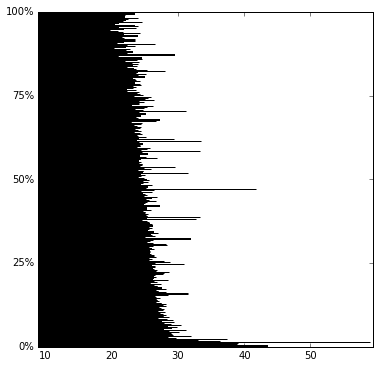


Y10_general Y09_pout
High group: # 112, 5%, AVG 34.65
	 Positive group: # 112, 100%, AVG 26.99
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 25.90
	 Positive group: # 225, 100%, AVG 25.54
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 17.39
	 Positive group: # 113, 100%, AVG 23.96
	 Negative group: # 0, 0%, AVG nan


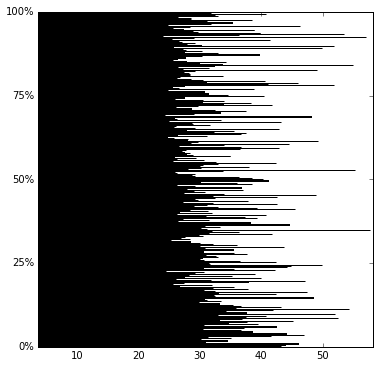


Y10_general Y10_pin
High group: # 112, 5%, AVG 34.65
	 Positive group: # 112, 100%, AVG 26.29
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 25.90
	 Positive group: # 225, 100%, AVG 24.09
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 17.39
	 Positive group: # 113, 100%, AVG 22.87
	 Negative group: # 0, 0%, AVG nan


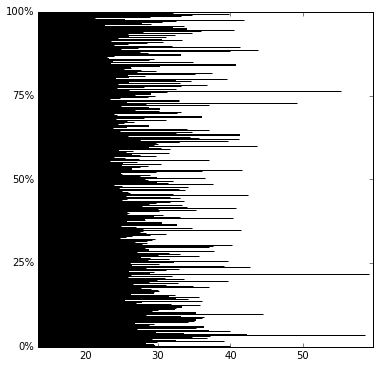


Y10_general diff_general
High group: # 112, 5%, AVG 34.65
	 Positive group: # 102, 91%, AVG 5.36
	 Negative group: # 10, 9%, AVG -3.62
Middle group: # 225, 10%, AVG 25.90
	 Positive group: # 219, 97%, AVG 2.47
	 Negative group: # 6, 5%, AVG -4.27
Low group: # 113, 5%, AVG 17.39
	 Positive group: # 63, 56%, AVG 1.95
	 Negative group: # 50, 45%, AVG -3.23


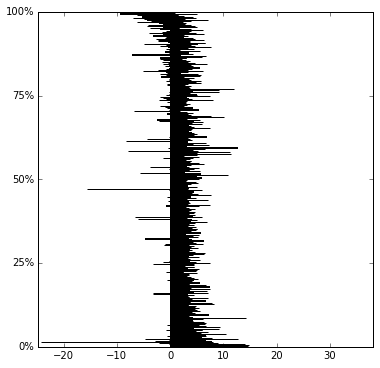


Y10_general Y09_pin
High group: # 112, 5%, AVG 34.65
	 Positive group: # 112, 100%, AVG 23.76
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 25.90
	 Positive group: # 225, 100%, AVG 22.55
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG 17.39
	 Positive group: # 113, 100%, AVG 21.64
	 Negative group: # 0, 0%, AVG nan


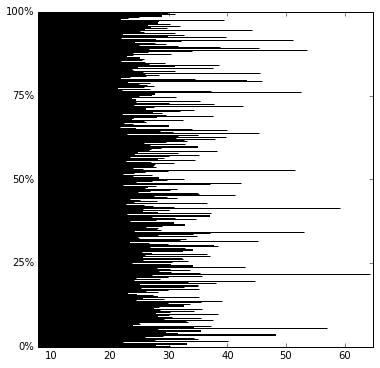


Y10_general Y10_general
High group: # 112, 5%, AVG 34.65
Middle group: # 225, 10%, AVG 25.90
Low group: # 113, 5%, AVG 17.39


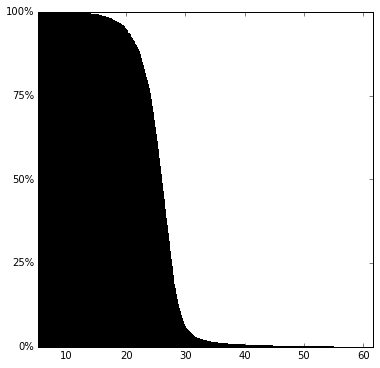


Y10_general diff_pout
High group: # 112, 5%, AVG 34.65
	 Positive group: # 86, 77%, AVG 5.43
	 Negative group: # 26, 23%, AVG -5.20
Middle group: # 225, 10%, AVG 25.90
	 Positive group: # 176, 78%, AVG 4.72
	 Negative group: # 49, 44%, AVG -4.49
Low group: # 113, 5%, AVG 17.39
	 Positive group: # 78, 69%, AVG 3.78
	 Negative group: # 35, 31%, AVG -5.60


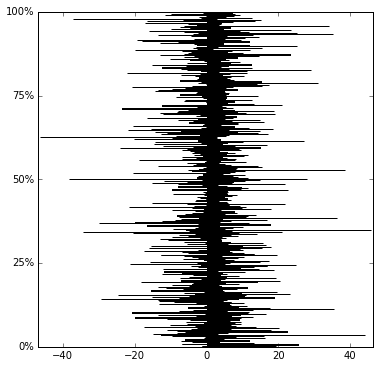


Y10_general diff_pin
High group: # 112, 5%, AVG 34.65
	 Positive group: # 94, 84%, AVG 3.62
	 Negative group: # 18, 16%, AVG -3.14
Middle group: # 225, 10%, AVG 25.90
	 Positive group: # 173, 77%, AVG 3.01
	 Negative group: # 52, 46%, AVG -3.36
Low group: # 113, 5%, AVG 17.39
	 Positive group: # 76, 67%, AVG 3.65
	 Negative group: # 37, 33%, AVG -3.74


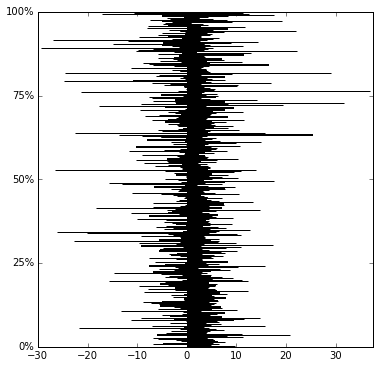


diff_pout Y09_general
High group: # 112, 5%, AVG 18.10
	 Positive group: # 112, 100%, AVG 23.49
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 225, 100%, AVG 23.38
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -15.12
	 Positive group: # 113, 100%, AVG 23.65
	 Negative group: # 0, 0%, AVG nan


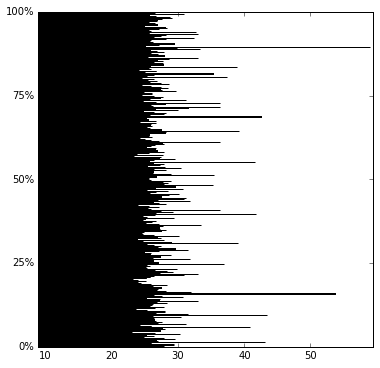


diff_pout Y09_pout
High group: # 112, 5%, AVG 18.10
	 Positive group: # 112, 100%, AVG 37.13
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 225, 100%, AVG 23.98
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -15.12
	 Positive group: # 113, 100%, AVG 22.26
	 Negative group: # 0, 0%, AVG nan


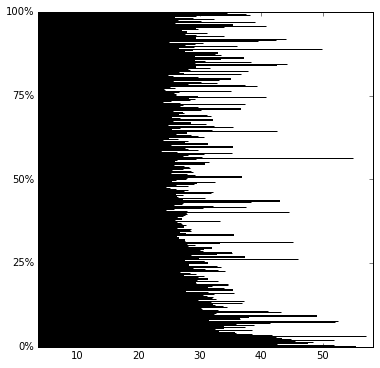


diff_pout Y10_pin
High group: # 112, 5%, AVG 18.10
	 Positive group: # 112, 100%, AVG 28.53
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 225, 100%, AVG 22.87
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -15.12
	 Positive group: # 113, 100%, AVG 27.20
	 Negative group: # 0, 0%, AVG nan


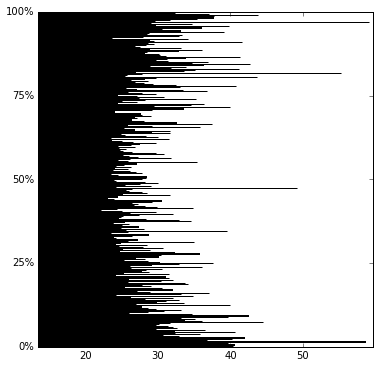


diff_pout diff_general
High group: # 112, 5%, AVG 18.10
	 Positive group: # 104, 93%, AVG 3.02
	 Negative group: # 8, 7%, AVG -2.23
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 209, 93%, AVG 2.57
	 Negative group: # 16, 14%, AVG -0.96
Low group: # 113, 5%, AVG -15.12
	 Positive group: # 106, 94%, AVG 2.40
	 Negative group: # 7, 6%, AVG -1.93


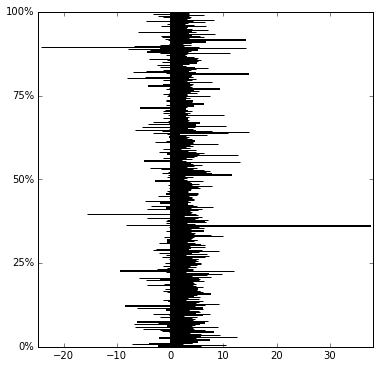


diff_pout Y09_pin
High group: # 112, 5%, AVG 18.10
	 Positive group: # 112, 100%, AVG 25.48
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 225, 100%, AVG 21.25
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -15.12
	 Positive group: # 113, 100%, AVG 26.79
	 Negative group: # 0, 0%, AVG nan


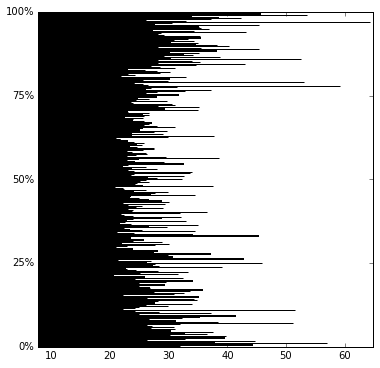


diff_pout Y10_general
High group: # 112, 5%, AVG 18.10
	 Positive group: # 112, 100%, AVG 26.14
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 225, 100%, AVG 25.70
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -15.12
	 Positive group: # 113, 100%, AVG 25.78
	 Negative group: # 0, 0%, AVG nan


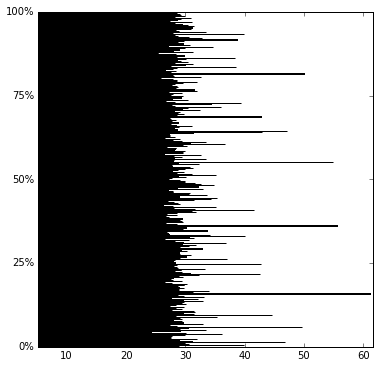


diff_pout diff_pout
High group: # 112, 5%, AVG 18.10
Middle group: # 225, 10%, AVG 2.22
Low group: # 113, 5%, AVG -15.12


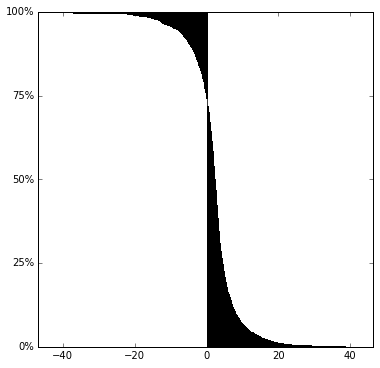


diff_pout diff_pin
High group: # 112, 5%, AVG 18.10
	 Positive group: # 84, 75%, AVG 5.65
	 Negative group: # 28, 25%, AVG -4.75
Middle group: # 225, 10%, AVG 2.22
	 Positive group: # 188, 84%, AVG 2.37
	 Negative group: # 37, 33%, AVG -2.19
Low group: # 113, 5%, AVG -15.12
	 Positive group: # 67, 59%, AVG 4.21
	 Negative group: # 46, 41%, AVG -5.14


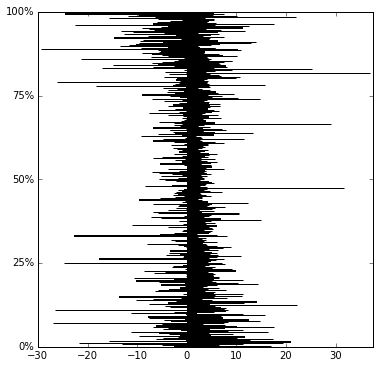


diff_pin Y09_general
High group: # 112, 5%, AVG 11.62
	 Positive group: # 112, 100%, AVG 23.07
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 1.86
	 Positive group: # 225, 100%, AVG 23.51
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -9.95
	 Positive group: # 113, 100%, AVG 23.27
	 Negative group: # 0, 0%, AVG nan


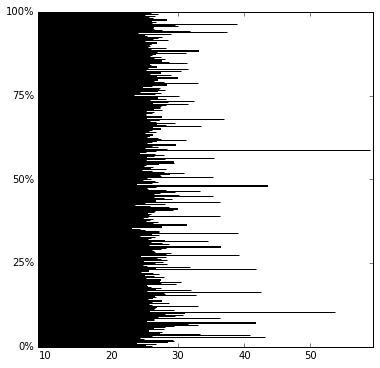


diff_pin Y09_pout
High group: # 112, 5%, AVG 11.62
	 Positive group: # 112, 100%, AVG 29.50
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 1.86
	 Positive group: # 225, 100%, AVG 25.17
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -9.95
	 Positive group: # 113, 100%, AVG 26.95
	 Negative group: # 0, 0%, AVG nan


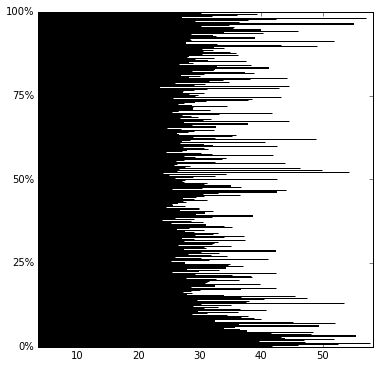


diff_pin Y10_pin
High group: # 112, 5%, AVG 11.62
	 Positive group: # 112, 100%, AVG 32.45
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 1.86
	 Positive group: # 225, 100%, AVG 23.10
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -9.95
	 Positive group: # 113, 100%, AVG 24.30
	 Negative group: # 0, 0%, AVG nan


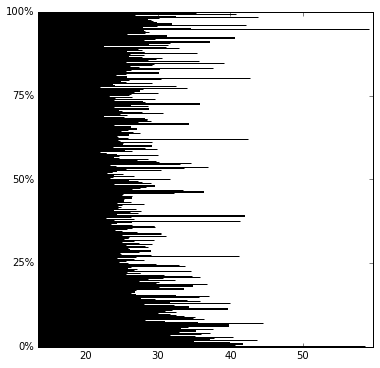


diff_pin diff_general
High group: # 112, 5%, AVG 11.62
	 Positive group: # 100, 89%, AVG 3.05
	 Negative group: # 12, 11%, AVG -3.93
Middle group: # 225, 10%, AVG 1.86
	 Positive group: # 209, 93%, AVG 2.48
	 Negative group: # 16, 14%, AVG -1.26
Low group: # 113, 5%, AVG -9.95
	 Positive group: # 97, 86%, AVG 2.63
	 Negative group: # 16, 14%, AVG -1.49


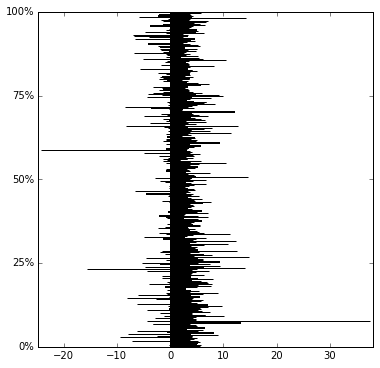


diff_pin Y09_pin
High group: # 112, 5%, AVG 11.62
	 Positive group: # 112, 100%, AVG 20.83
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 1.86
	 Positive group: # 225, 100%, AVG 21.23
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -9.95
	 Positive group: # 113, 100%, AVG 34.25
	 Negative group: # 0, 0%, AVG nan


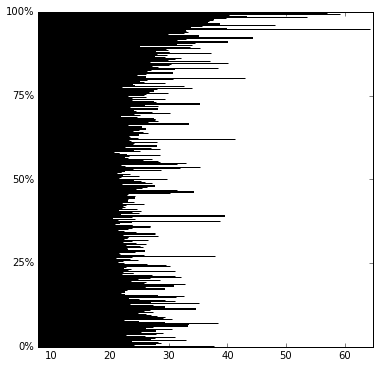


diff_pin Y10_general
High group: # 112, 5%, AVG 11.62
	 Positive group: # 112, 100%, AVG 25.38
	 Negative group: # 0, 0%, AVG nan
Middle group: # 225, 10%, AVG 1.86
	 Positive group: # 225, 100%, AVG 25.73
	 Negative group: # 0, 0%, AVG nan
Low group: # 113, 5%, AVG -9.95
	 Positive group: # 113, 100%, AVG 25.31
	 Negative group: # 0, 0%, AVG nan


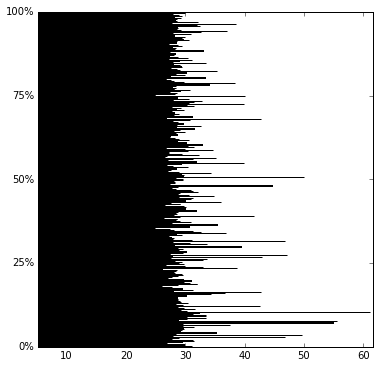


diff_pin diff_pout
High group: # 112, 5%, AVG 11.62
	 Positive group: # 78, 70%, AVG 10.86
	 Negative group: # 34, 30%, AVG -5.37
Middle group: # 225, 10%, AVG 1.86
	 Positive group: # 182, 81%, AVG 3.91
	 Negative group: # 43, 38%, AVG -3.70
Low group: # 113, 5%, AVG -9.95
	 Positive group: # 58, 51%, AVG 6.18
	 Negative group: # 55, 49%, AVG -7.52


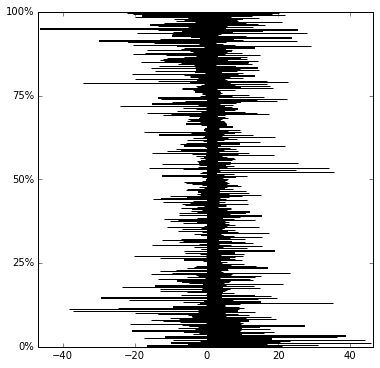


diff_pin diff_pin
High group: # 112, 5%, AVG 11.62
Middle group: # 225, 10%, AVG 1.86
Low group: # 113, 5%, AVG -9.95


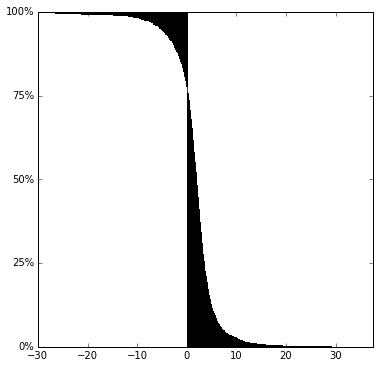

In [11]:
for k1, v1 in data_choices.iteritems():
    for k2, v2 in data_choices.iteritems():
        print k1, k2
        summary_of_classification(data_ranges, v1, v2)
        print